# Logistic Regression: Ads Click Prediction 

In this project we will build a simple logistic regression model using the [Ad Click prediction dataset] downloaded from (https://www.kaggle.com/jahnveenarang/cvdcvd-vd).

We will work with some demographic data to predict whether a user purchased something after clicking on an ad or not. We will start off by importing the libraries and datasets.

### Importing the libraries and datasets

First we should import the required libraries and the dataset

In [1]:
#Basics
import pandas as pd
import numpy as np

#Visualization
import matplotlib.pyplot as plot
import seaborn as sns
import matplotlib.pyplot as plt

#SKLearn ML
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import plot_confusion_matrix, confusion_matrix
from sklearn.preprocessing import StandardScaler

In [3]:
#Loading dataset
sn_ads = pd.read_csv(r"C:\Users\LENOVO\Desktop\Datasets\Social_Network_Ads.csv")

In [4]:
#display the loaded dataframe
sn_ads

,User ID,Female,Age,EstimatedSalary,Purchased
0,15624510,0,19,19000,0
1,15810944,0,35,20000,0
2,15668575,1,26,43000,0
3,15603246,1,27,57000,0
4,15804002,0,19,76000,0
...,...,...,...,...,...
395,15691863,1,46,41000,1
396,15706071,0,51,23000,1
397,15654296,1,50,20000,1
398,15755018,0,36,33000,0


We have 5 different columns outlying customer ID, gender, age, estimated salary and whether they purchased a product after clicking on an ad.

'User ID': unique identification for consumer\
'Age': cutomer age in years\
'Estimated Salary': Avg. Income of consumer\
'Female': Whether consumer was male or female\
'Purchased': 0 or 1 indicated clicking on Ad\

### Exploring the dataset

We can see the size of our [dataframe](https://pandas.pydata.org/pandas-docs/stable/user_guide/dsintro.html#dataframe) using [df.shape](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.shape.html) from Python's [Pandas](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.head.html) library.

In [5]:
sn_ads.shape

(400, 5)

We can see that there are 400 rows (data entries) and 5 columns (features). We can also look at the top few entries to get an idea about the data

In [6]:
sn_ads.head()

,User ID,Female,Age,EstimatedSalary,Purchased
0,15624510,0,19,19000,0
1,15810944,0,35,20000,0
2,15668575,1,26,43000,0
3,15603246,1,27,57000,0
4,15804002,0,19,76000,0


Now let's look at the types of the data columns

In [7]:
sn_ads.dtypes

User ID            int64
Female             int64
Age                int64
EstimatedSalary    int64
Purchased          int64
dtype: object

### Visualisation Exploration of the Data

We can take a look at our data by plotting using the [Seaborn](https://seaborn.pydata.org/) and [matplotlib](https://matplotlib.org/) packages.

#### Plotting Histogram

Histogram refers to the frequency of occurrence of variables in an interval, it is useful to see the different categories of data and how frequently they occur in a column. Next, we will look at the histogram of male and female distribution across the ranges of age. Most people are included between the 20 and 50 year-old bracket.

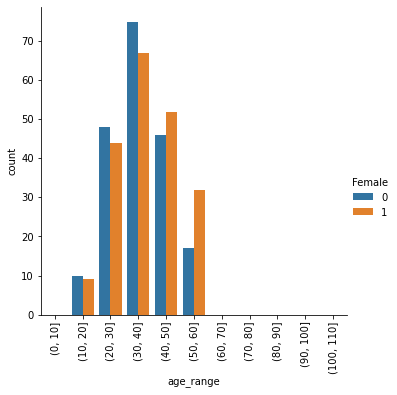

In [8]:
#plot a histogram of count by age_range, with one series per gender
sn_ads_bins = sn_ads[sn_ads.Age.notna()]

bins = list(range(0, 120, 10))
sn_ads_bins['age_range'] = pd.cut(sn_ads.Age, bins=bins)
chart = sns.catplot(x="age_range", kind="count", hue="Female", data=sn_ads_bins);
for axes in chart.axes.flat:
    axes.set_xticklabels(axes.get_xticklabels(), rotation=90)

We can see that the distribution of data in the dataset is roughly equal. A balanced dataset is the one that contains equal or almost equal number of samples from the positive and negative class. If one of the class outnumbers the other in the dataset, then the distrubtion is known to be skewed - or in favour of one class, as the results will introduce a bias towards that class, which can affect our results and the assumptions we are making.

## Using Sklearn
We will be using [sklearn](https://scikit-learn.org/stable/) for fitting the first logistic regression model. We will split our dataframe into the following:
- A single column for the target variable (technically a Series)
- Remaining columns for the inputs (Since there are multiple columns this is a dataframe) 


In [9]:
#Separate x_inputs from y_target variables
y_target = sn_ads.Purchased
x_inputs = sn_ads[['Female','Age','EstimatedSalary']]

#### Splitting dataset into Training and Test sets

It is generally a good practice in Machine learning to split the dataset into training and test sets to evaluate how well our model does when trained on a set of data (train) and predicting on data it has not seen before (test). We will use Sklearn's [train_test_split](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html) to divide our dataset as shown below.

Now we will finalise our training data or independent features (X) and also specify our outcome variable (Y). 

In [10]:
#Split the data into training and test sets using the function
x_train, x_test, y_train, y_test = train_test_split(x_inputs, y_target, train_size=0.75)

print("X_train:", x_train.shape)
print("X_test:", x_test.shape)
print("Y_train:", len(y_train))
print("Y_test:", len(y_test))

X_train: (300, 3)
X_test: (100, 3)
Y_train: 300
Y_test: 100


#### Pre-processing step (Scaling data)

Before we fit the logistic regression, we will scale the data. This step will normalise all the data and it is especially helpful in dataset with variables in different units. To do so, we use the [StandardScaler()](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html) method from Sklearn. 

It will simply standardise all of our numeric units by subtracting the mean and dividing it by the standard deviation.

In [11]:
sc_X = StandardScaler()

In [12]:
x_train = sc_X.fit_transform(x_train)

In [13]:
x_test = sc_X.fit_transform(x_test)

#### Fitting the model and evaluating results

We again, firstly declare the model using [LogisticRegression()](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html#sklearn.linear_model.LogisticRegression.score) and then fit it to our training dataset and labels.

In [14]:
#Declare a logistic regression classifier
classifier = LogisticRegression(max_iter=1000).fit(x_train, y_train)

We can now predict on the test data to see what the predictions would be like for unseen data by the model.

In [15]:
#Make predictions on test data
pred = classifier.predict(x_train)

We can use the [.score()](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html#sklearn.linear_model.LogisticRegression.score) method as a first way of understanding how good our model is. The method works by returning the mean accuracy on the given test. We will learn more about other ways of measuring performance in later chapters

In [21]:
#Print out score on the train data
classifier.score(x_train, y_train)

0.85

The score here evaluates the performance of the model, by default, the classifier uses Accuracy as the score. It is the ratio of number of correct predictions to the total number of predictions. It is essentially the fraction of predictions the model got right. It works well with a balanced class, hence, it is essential to have a quick look at the distribution of the class as done above. 

These four outcomes can also be depicted in the form of a confusion matrix, which is nothing but a visual representation of how many times these outcomes occured for our model's predictions.

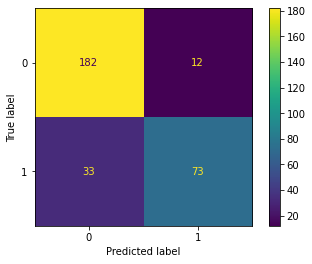

In [23]:
#Plot the confusion matrix
plot_confusion_matrix(classifier, x_train, y_train);

In later chapter's we'll look more closely at how to interpret the confusion matrix.

## Fitting the Linear Regression Model

To fit the model using [statsmodels](https://www.statsmodels.org/stable/index.html) we first separate our target variable (Y) and independent variables (X). As we want to predict the purchase, this is our target variable Y. The rest are our independet variables X. 

## Using Statsmodel
Now, we will have a look at using the Statsmodel library for fitting logistic regression model. We will specify the model and in the next step we will fit the model.

In [24]:
import statsmodels.api as sm

In [25]:
# building the model 
log_reg = sm.Logit(endog = y_target, exog=x_inputs)

# #fitting the data
log_reg = log_reg.fit()

Optimization terminated successfully.
         Current function value: 0.677546
         Iterations 4


Now we will print the model results summary. The summary includes information on the fit process as well as the estimated coefficients.

In [28]:
log_reg.summary(xname=['Female', 'Age', 'EstimatedSalary'])

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:              Purchased   No. Observations:                  400
Model:                          Logit   Df Residuals:                      397
Method:                           MLE   Df Model:                            2
Date:                Thu, 15 Dec 2022   Pseudo R-squ.:                -0.03923
Time:                        12:09:37   Log-Likelihood:                -271.02
converged:                       True   LL-Null:                       -260.79
Covariance Type:            nonrobust   LLR p-value:                     1.000
===================================================================================
                      coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------
Female             -0.5371      0.201     -2.666      0.008      -0.932      -0.142
Age                -0.0002      0.006     -0.035      0.972      -0.012       0.011
EstimatedSalary  6.209e-07   2.82e-06      0.220      0.826   -4.91e-06    6.15e-06
===================================================================================
"""

The top section shows the statistics of the model. The coef column shows the value for the coefficients $\gamma$=$\beta$<sub>o</sub>+$\beta$<sub>1</sub>x from our logistic regression formula. 

The column P>|z| shows the p-values. A p-value is a probability measure. If this p-value meets an established threshold for statistical significance, then we can conclude model fits the data better than the null model. The z-statistic equals the coefficient divided by its standard error.

 Age and Estimated Salary have a very p-value greater than 0.05 meaning they are not statistically significant in helping predict the output variable. 

#### Log Odds and Interpretation

The Female coefficient (x1) has a coefficient of β=-0.5371 and is statistically significant (p-value of 0.000). We now want to look at the interpretation transforming the coefficients into log odds. We do so by taking the exponential of the parameters. We can remember that Female is our x1 variable.

In [29]:
odds_ratios = pd.DataFrame({"Odds Ratio": log_reg.params})

odds_ratios = np.exp(odds_ratios)
print(odds_ratios)

                 Odds Ratio
Female             0.584419
Age                0.999796
EstimatedSalary    1.000001


Taking the exponent of the Female coefficient (-0.5371), we can see that odd ratio is 0.58. We can say that the odds of one gender (male) purchasing the item are just over half compared to females. We can remember that 0 is the encoded label for female and 1 is the encoded label for male.

#### END OF NOTEBOOK